General Dataset Head:
          Date  Day     Month  Year  Customer_Age       Age_Group  \
0  11/26/2013   26  November  2013            19     Youth (<25)   
1  11/26/2015   26  November  2015            19     Youth (<25)   
2   3/23/2014   23     March  2014            49  Adults (35-64)   
3   3/23/2016   23     March  2016            49  Adults (35-64)   
4   5/15/2014   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country            Region Product_Category    Category  \
0               M     Canada  British Columbia      Accessories  Bike Racks   
1               M     Canada  British Columbia      Accessories  Bike Racks   
2               M  Australia   New South Wales      Accessories  Bike Racks   
3               M  Australia   New South Wales      Accessories  Bike Racks   
4               F  Australia   New South Wales      Accessories  Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
0  Hitch Rack - 4-Bi

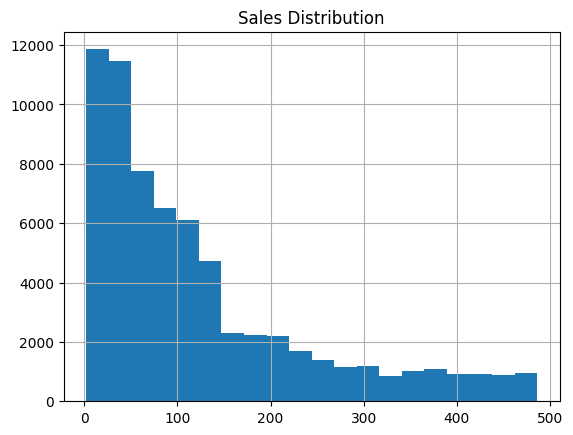

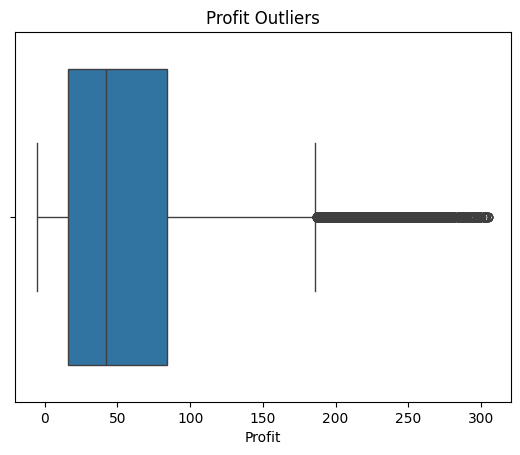

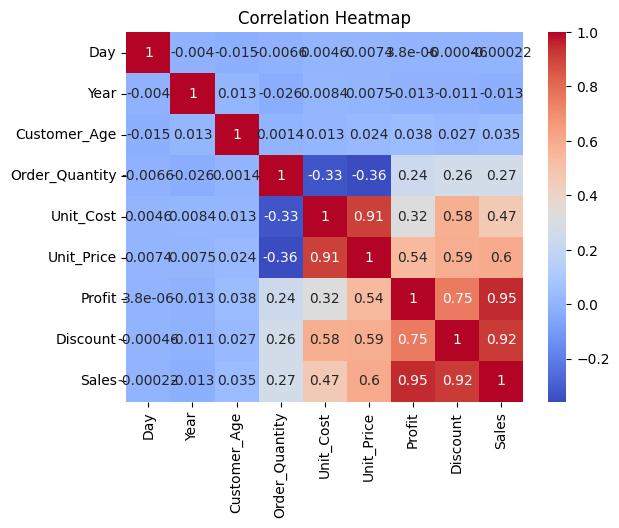

Cleaned data saved to cleaned_data.csv.


In [6]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Project 1: General EDA
# Load dataset 
df = pd.read_csv("sales_data.csv")

# Preview the data
print("General Dataset Head:\n", df.head())

# Initial inspection
print(df.info())
print(df.describe())

# Data Cleaning
# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

numeric_cols = df.select_dtypes(include=[np.number]).columns  # Only numeric columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]


# Statistical Analysis

print("Mean:\n", df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Standard Deviation:\n", df.std(numeric_only=True))

numeric_cols = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_cols.corr()  # Compute correlation matrix

# Data Visualization
# Histogram
df['Sales'].hist(bins=20)
plt.title("Sales Distribution")
plt.show()

# Boxplot for Outliers
sns.boxplot(x=df['Profit'])
plt.title("Profit Outliers")
plt.show()

# Heatmap for correlations


sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Save cleaned data
cleaned_data_path = 'cleaned_data.csv'
df.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}.")